This model is the third option. Just predicting google by its own historical data.

In [20]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv("../GOOGL_stock_data.csv")
data["Date"] = pd.to_datetime(data["Date"])
data = data.sort_values("Date")

# Feature engineering: Create lagged features (e.g., Close price from previous days)
data["Close_Lag1"] = data["Close"].shift(1)
data["Close_Lag2"] = data["Close"].shift(2)
data["Close_Lag3"] = data["Close"].shift(3)

# Drop rows with missing lagged values
data = data.dropna().reset_index(drop=True)

print(data.tail())



           Date        Open        High         Low       Close   Adj Close  \
3126 2024-10-25  163.669998  165.589996  163.419998  165.270004  165.270004   
3127 2024-10-28  168.750000  168.750000  163.949997  166.720001  166.720001   
3128 2024-10-29  167.729996  170.380005  167.089996  169.679993  169.679993   
3129 2024-10-30  180.679993  182.020004  174.059998  174.460007  174.460007   
3130 2024-10-31  173.130005  176.820007  171.000000  171.110001  171.110001   

        Volume  Close_Lag1  Close_Lag2  Close_Lag3  
3126  19828900  162.720001  162.779999  165.139999  
3127  32138600  165.270004  162.720001  162.779999  
3128  42169000  166.720001  165.270004  162.720001  
3129  68890800  169.679993  166.720001  165.270004  
3130  44769000  174.460007  169.679993  166.720001  


In [22]:
# Number of days to predict
n_predict = 550

# Define training and test sets
train_data = data.iloc[:-n_predict]  # All rows except the last 'n_predict'
test_data = data.iloc[-n_predict:]  # The last 'n_predict' rows

# Define features and target for train and test sets
X_train = train_data[["Close_Lag1", "Close_Lag2", "Close_Lag3"]]
y_train = train_data["Close"]

X_test = test_data[["Close_Lag1", "Close_Lag2", "Close_Lag3"]]
y_test = test_data["Close"]

print(f"Training data size: {len(X_train)}, Test data size: {len(X_test)}")



Training data size: 2581, Test data size: 550


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Print model coefficients
print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)



Coefficients: [ 0.93365669  0.08837669 -0.0222928 ]
Intercept: 0.054318658758909066


Recent prices heavily influence predictions, shown by the dominant coefficient for the most recent lagged feature. The intercept is a baseline adjustment.

In [24]:
# Predict on the test set (last 'n_predict' rows)
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")



Mean Squared Error: 6.083821212678345
R^2 Score: 0.9922332326934049


The scores highlight the model's effectiveness for short-term predictions based on historical data.

In [19]:
print(train_data.tail())
print(test_data.head())

           Date        Open        High         Low       Close   Adj Close  \
2396 2021-11-30  145.008499  146.000000  141.601501  141.897507  141.547028   
2397 2021-12-01  144.000000  145.950500  140.912003  141.051498  140.703094   
2398 2021-12-02  141.250000  143.864502  140.214493  142.966003  142.612869   
2399 2021-12-03  143.681000  144.399994  140.300995  142.001495  141.650757   
2400 2021-12-06  143.040497  143.852493  140.149994  143.154999  142.801392   

        Volume  Close_Lag1  Close_Lag2  Close_Lag3  
2396  42068000  145.530502  142.182999  146.119995  
2397  34020000  141.897507  145.530502  142.182999  
2398  29194000  141.051498  141.897507  145.530502  
2399  41230000  142.966003  141.051498  141.897507  
2400  30618000  142.001495  142.966003  141.051498  
           Date        Open        High         Low       Close   Adj Close  \
2401 2021-12-07  145.596497  147.531006  145.227493  147.269501  146.905731   
2402 2021-12-08  147.596497  148.393005  146.4060

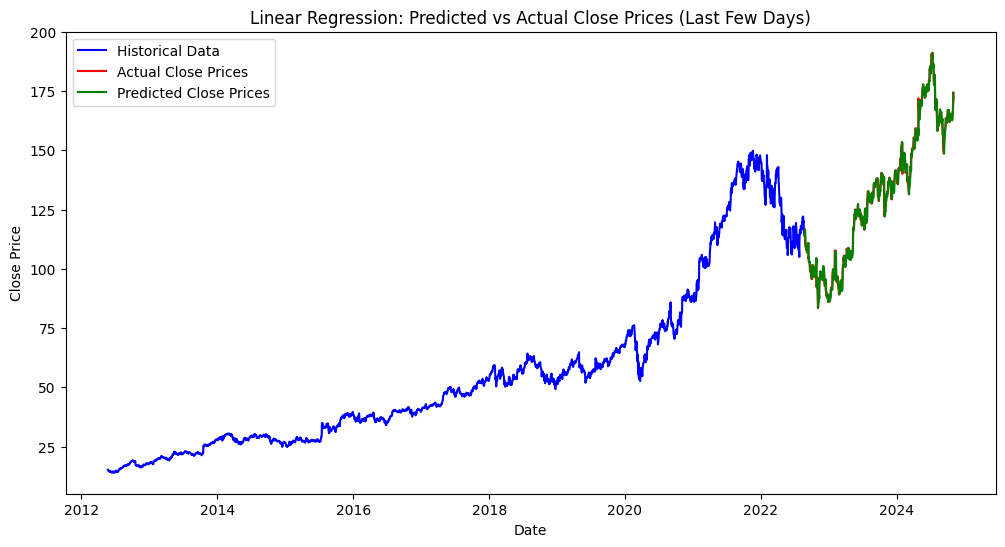

In [25]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(train_data["Date"], train_data["Close"], label="Historical Data", color="blue")

# Plot actual and predicted test data
plt.plot(test_data["Date"], y_test, label="Actual Close Prices", color="red")
plt.plot(test_data["Date"], y_pred, label="Predicted Close Prices", color="green")

# Add labels and legend
plt.title("Linear Regression: Predicted vs Actual Close Prices (Last Few Days)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()



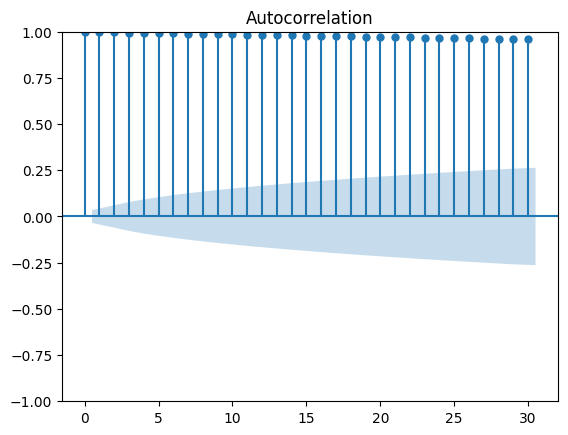

In [26]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data["Close"], lags=30)
plt.show()

High autocorrelation at low lags - prices are highly dependent on their immediate past values (typical for financial time series).
As the lag increases, the autocorrelation decreases, so the relationship between past and current becomes weaker.